### **Sistemas de control difusos: el problema de las propinas**

El "problema de propinas" se usa comúnmente para ilustrar el poder de los principios de lógica difusa para generar un comportamiento complejo a partir de un conjunto compacto e intuitivo de reglas expertas.

Creemos un sistema de control difuso que modele cómo puede elegir dar propina en un restaurante. Al dar propina, considera el **servicio** y la **calidad de los alimentos**, con una calificación entre 0 y 10. Lo usa para dejar una **propina** de entre 0 y 25%.

Formularíamos este problema como:

    Antecedentes (Inputs)

            servicio
                    Universo (ie, crisp value range): Qué tan bueno fue el servicio del personal, en una escala de 0 a 10
                    Fuzzy set (ie, fuzzy value range): poor, acceptable, amazing

            calidad de la comida
                    Universe: qué sabrosa era la comida, en una escala de 0 a 10?
                    Fuzzy set: bad, decent, great

    Consecuentes (Outputs)

            tip
                    Universe: ¿Cuánto deberíamos dar propina, en una escala del 0% al 25%?
                    Fuzzy set: low, medium, high

    Reglas
            IF the service was good or the food quality was good, THEN the tip will be high.
            IF the service was average, THEN the tip will be medium.
            IF the service was poor and the food quality was poor THEN the tip will be low.

    Ejemplo de Uso

            If I tell this controller that I rated:
                    the service as 9.8, and
                    the quality as 6.5,

            it would recommend I leave:
                    a 20.2% tip.

Creación del controlador de propina utilizando la API de control skfuzzy

Primero, definamos las variables difusas

In [1]:
pip install -U scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894079 sha256=e430febff336d92feda3ff588fa3d2d8e1e75c02a95252fe9c4a5d4968500417
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# Auto-membership function population is possible with .automf(3, 5, or 7)
quality.automf(5)
service.automf(5)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip['muybaja'] = fuzz.trimf(tip.universe, [0, 3, 10])
tip['baja'] = fuzz.trimf(tip.universe, [0, 4, 10])
tip['media'] = fuzz.trimf(tip.universe, [3, 5, 10])
tip['sobresaliente'] = fuzz.trimf(tip.universe, [5,7 , 10])
tip['alta'] = fuzz.trimf(tip.universe, [7, 10, 10])

Para ayudar a comprender cómo se ve la membresía, use los métodos de visualización.


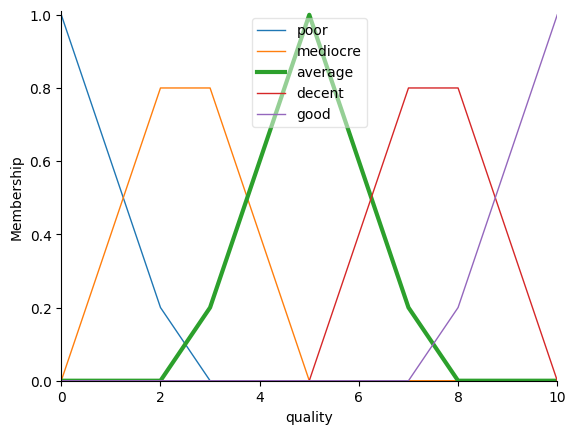

In [3]:
# You can see how these look with .view()
quality['average'].view()

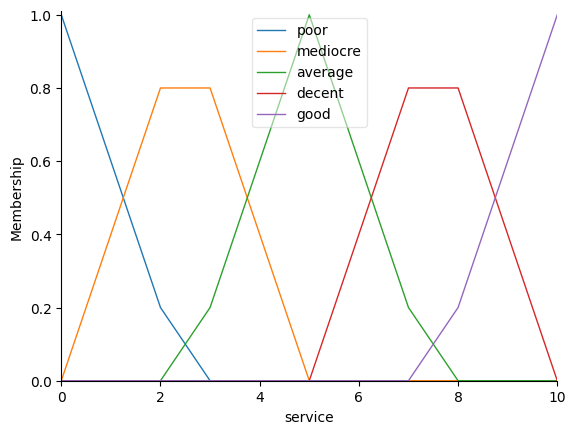

In [4]:
service.view()

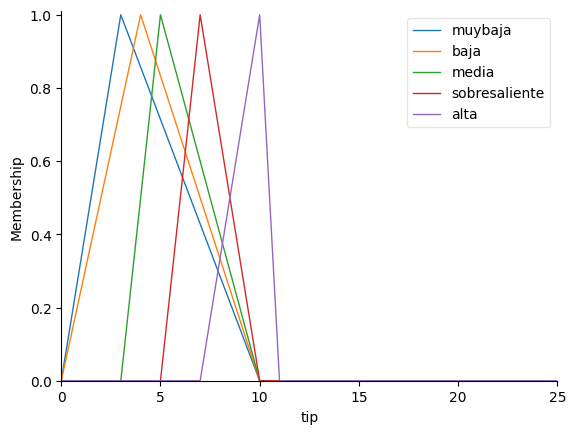

In [5]:
tip.view()

Reglas difusas

Ahora, para hacer que estos triángulos sean útiles, definimos la relación difusa entre las variables de entrada y salida. Para los propósitos de nuestro ejemplo, considere tres reglas simples:

    If the food is poor OR the service is poor, then the tip will be low
    If the service is average, then the tip will be medium
    If the food is good OR the service is good, then the tip will be high.

La mayoría de la gente estaría de acuerdo con estas reglas, pero las reglas son confusas. Mapear las reglas imprecisas en una punta definida y procesable es un desafío. Este es el tipo de tarea en la que sobresale la lógica difusa.

In [6]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['poor'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

rule1.view()

ValueError: ignored

Creación y simulación de sistemas de control¶

Ahora que tenemos nuestras reglas definidas, simplemente podemos crear un sistema de control a través de:

In [ ]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

Para simular este sistema de control, crearemos un ControlSystemSimulation. Este objeto que representa nuestro controlador es usado para dar propina. Cada vez que se quiera usar se debe crear uno especifoc: por ejemplo, esto podría estar dando propina a Juan en un bar. Creamos otro ControlSystemSimulation cuando intentamos dar propinas a Maria en un café si cambiamos las entradas.

In [ ]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

Ahora podemos simular nuestro sistema de control simplemente especificando las entradas y llamando al método de cálculo. Supongamos que calificamos la calidad 6.5 de 10 y el servicio 9.8 de 10.

In [ ]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8

# Crunch the numbers
tipping.compute()

Una vez calculado, podemos ver el resultado y visualizarlo.

In [ ]:
print (tipping.output['tip'])
tip.view(sim=tipping)

La sugerencia sugerida resultante es 19.84%.

**Analisis final**

El poder de los sistemas difusos permite un comportamiento complicado e intuitivo basado en un sistema escaso de reglas con una sobrecarga mínima. Tenga en cuenta que nuestros universos de funciones de membresía eran gruesos, solo se definieron en los enteros, pero fuzz.interp_membership permitió que la resolución efectiva aumentara según la demanda. Este sistema puede responder a cambios arbitrariamente pequeños en las entradas, y la carga de procesamiento es mínima.


**Tareas**


1) Plantee nuevas reglas para el modelo anterior y redefina el modelo de control (Haga un sistema de 5 reglas). Que le infiere su modelo para la calidad 6.5 y el servicio 9.8?

2) Defina sus reglas para el agente que esta desarrollando en clases. Para ello, debe definir primero las variables difusas, y despues los conjuntos difusos de cada una